In [130]:
# ref https://towardsdatascience.com/a-possible-trading-strategy-technical-analysis-with-python-ee1168b5f117

In [131]:
import pandas as pd
import numpy as np

In [132]:
data = pd.read_excel('_cotacoes_completa_diario.xlsx')

In [133]:
data.head()

,time,open IBOV,high IBOV,low IBOV,close IBOV,volume IBOV,open ABEV3,high ABEV3,low ABEV3,close ABEV3,...,open WEGE3,high WEGE3,low WEGE3,close WEGE3,volume WEGE3,open YDUQ3,high YDUQ3,low YDUQ3,close YDUQ3,volume YDUQ3
0,2011-07-01,62404,63455,62148,63394,5519544440,7.92,8.03,7.78,8.01,...,4.32,4.39,4.32,4.38,331056,5.06,5.14,4.97,5.14,770164
1,2011-07-04,63397,63891,63314,63891,1848898245,8.01,8.07,7.95,7.99,...,4.35,4.44,4.34,4.34,199471,5.14,5.29,5.06,5.11,270019
2,2011-07-05,63886,63886,63030,63039,3691016029,7.95,8.11,7.92,8.07,...,4.40,4.43,4.37,4.41,1062133,5.19,5.28,5.14,5.20,488745
3,2011-07-06,63039,63039,62391,62565,3327668041,8.05,8.15,8.00,8.04,...,4.40,4.58,4.40,4.58,1592191,5.16,5.17,5.04,5.14,102905
4,2011-07-07,62573,63206,62207,62207,3893204838,8.15,8.15,7.94,7.94,...,4.58,4.60,4.39,4.44,1087891,5.14,5.28,5.05,5.19,565246


In [134]:
dados = data[['time', 'open IBOV', 'high IBOV', 'low IBOV', 'close IBOV','volume IBOV']].copy()

In [135]:
dados.head()

,time,open IBOV,high IBOV,low IBOV,close IBOV,volume IBOV
0,2011-07-01,62404,63455,62148,63394,5519544440
1,2011-07-04,63397,63891,63314,63891,1848898245
2,2011-07-05,63886,63886,63030,63039,3691016029
3,2011-07-06,63039,63039,62391,62565,3327668041
4,2011-07-07,62573,63206,62207,62207,3893204838


In [136]:
rsi_period = 14
chg = dados['close IBOV'].diff(1) #variação em 1 vela
gain = chg.mask(chg<0,0) #pega somente as changes positivas
loss = chg.mask(chg>0,0) #pega somente as changes negativas
dados['gain'] = gain
dados['loss'] = loss

In [137]:
dados.head(3)

,time,open IBOV,high IBOV,low IBOV,close IBOV,volume IBOV,gain,loss
0,2011-07-01,62404,63455,62148,63394,5519544440,NaN,NaN
1,2011-07-04,63397,63891,63314,63891,1848898245,497.0,0.0
2,2011-07-05,63886,63886,63030,63039,3691016029,0.0,-852.0


In [138]:
avg_gain = gain.ewm(com = rsi_period - 1, min_periods = rsi_period).mean() #exponential weighted function
avg_loss = loss.ewm(com = rsi_period - 1, min_periods = rsi_period).mean()

In [139]:
data['avg_gain'] = avg_gain
data['avg_loss'] = avg_loss

In [140]:
rs = abs(avg_gain/avg_loss)
rsi = 100-(100/(1+rs))
dados['rsi'] = rsi

In [141]:
for i in rsi:
    print(i)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
38.87635829055133
38.957787607018474
36.70825086663212
32.44978229110606
26.856036368688237
31.791015629385797
33.24610408913358
31.56579573292413
25.58108571691976
21.04262004800252
14.28193125512064
15.539823295332724
10.427628716300404
25.695911224200643
27.01253646582218
36.66189299596805
37.25803167958915
42.54008009097412
41.493508084426466
44.83127797031781
38.67933858771745
36.757537951952735
36.734615801945445
43.1616776455179
43.20319501528538
40.238372268109295
42.253258514663436
49.24500202409876
51.44213630211591
55.80642338516329
61.285502706384115
54.21230702844421
48.39448235820583
53.97382452503491
57.128841291580834
50.37833947638423
50.05742810219245
49.54215555137132
52.323424607383615
52.68303774469726
55.81502993288846
55.30617804177305
51.860933654229015
50.020864260597094
39.69721141518609
39.53460825432764
42.177097974644916
43.066821828109525
40.52883665400965
41.18918428994079
37.096558457701384
32.13195

In [142]:
x = np.arange(0,len(rsi),1)

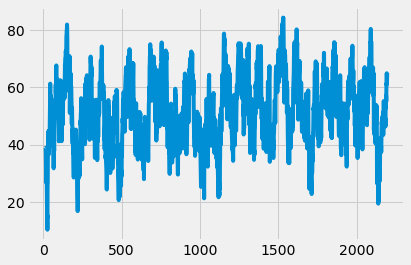

In [143]:
import matplotlib.pyplot as plt
plt.plot(x,rsi)
plt.show()

In [144]:
dados.head(20)

,time,open IBOV,high IBOV,low IBOV,close IBOV,volume IBOV,gain,loss,rsi
0,2011-07-01,62404,63455,62148,63394,5519544440,NaN,NaN,NaN
1,2011-07-04,63397,63891,63314,63891,1848898245,497.0,0.0,NaN
2,2011-07-05,63886,63886,63030,63039,3691016029,0.0,-852.0,NaN
3,2011-07-06,63039,63039,62391,62565,3327668041,0.0,-474.0,NaN
4,2011-07-07,62573,63206,62207,62207,3893204838,0.0,-358.0,NaN
5,2011-07-08,62207,62207,61366,61513,3623443624,0.0,-694.0,NaN
6,2011-07-11,61502,61502,60098,60224,3784385147,0.0,-1289.0,NaN
7,2011-07-12,60220,60516,59705,59705,4203798483,0.0,-519.0,NaN
8,2011-07-13,59718,60847,59718,60670,5084418456,965.0,0.0,NaN
9,2011-07-14,60673,60685,59452,59679,5067897166,0.0,-991.0,NaN


In [145]:
def ind_for(dados, periodo): #força
    pos = 0 #posicao
    tempo = periodo
    desempenho = []
    comprado = False
    #valor de compra, venda e resultado
    c = 0
    v = 0
    res = 0
    for i in range(len(dados)):
        rsi_value = (dados.rsi[dados.index==i].values[0])
        if comprado:
            tempo -= 1

        if rsi_value <= 25: #compra de acordo com o rsi
            if not comprado:
                comprado = True
                tempo = periodo
                c += dados['close IBOV'][dados.index ==i].values[0]

        if comprado == True and tempo == 0:
            comprado = False
            v += dados['close IBOV'][dados.index ==i].values[0]
            res = c-v
            c,v = 0,0

        if res not in desempenho:
            desempenho.append(res)
            
    return np.mean(desempenho)
        

In [146]:
for i in range(30):
    print(f'{i} : {ind_for(dados,i):.2f}')
    

0 : 0.00
1 : -386.20
2 : -274.47
3 : 1339.71
4 : 307.92
5 : 1555.00
6 : 1093.92
7 : 2213.75
8 : 2059.00
9 : 2404.36
10 : 2760.90
11 : 2261.20
12 : 1860.50
13 : 1138.50
14 : 2378.22
15 : 2466.78
16 : 2684.67
17 : 2882.67
18 : 2629.00
19 : 3028.22
20 : 2446.44
21 : 1908.00
22 : 1915.00
23 : 1905.33
24 : 1381.11
25 : 758.67
26 : 870.11
27 : 898.44
28 : 738.56
29 : 786.89


In [147]:
aa = np.arange(0,len(desempenho),1)
plt.plot(aa,desempenho)
plt.show()

NameError: name 'desempenho' is not defined

In [ ]:
nasdaq = data['close IBOV'].pct_change().apply(lambda x:np.log(1+x) )
mean_nasdaq = nasdaq.sum()/nasdaq.count()
sqd_nasdaq = nasdaq.apply(lambda x: (x-mean_nasdaq))
ssqd = sqd_nasdaq.sum()
var_nasdaq = ssqd/(nasdaq.count()-1)
print("The variance is: \n", (var_nasdaq))

In [ ]:
jj = data['close IBOV'].pct_change().var()
np.sqrt(jj)

In [ ]:
def ind_for(dados, periodo): #força
    pos = 0 #posicao
    tempo = periodo
    desempenho = []
    comprado = False
    vendido = False
    #valor de compra, venda e resultado
    c = 0
    v = 0
    res = 0
    for i in range(len(dados)):
        rsi_value = (dados.rsi[dados.index==i].values[0])
        if vendido:
            tempo -= 1

        if rsi_value >= 80: #compra de acordo com o rsi
            if not vendido:
                vendido = True
                tempo = periodo
                v += dados['close IBOV'][dados.index ==i].values[0]

        if vendido == True and tempo == 0:
            vendido = False
            c += dados['close IBOV'][dados.index ==i].values[0]
            res = v-c
            c,v = 0,0

        if res not in desempenho:
            desempenho.append(res)
            
    return np.mean(desempenho)
        

In [ ]:
for i in range(100):
    print(f'{i} : {ind_for(dados,i):.2f}')

In [ ]:
dados

In [ ]:
def vender(data,periodo):
    pos = 0 #posicao
    desempenho = []
    comprado = False
    vendido = False
    #valor de compra, venda e resultado
    c = 0
    v = 0
    res = 0
    for i in range(len(dados)):
        rsi_value = (dados.rsi[dados.index==i].values[0])
        if vendido:
            tempo -= 1

        if rsi_value >= 80: #compra de acordo com o rsi
            if not vendido:
                vendido = True
                tempo = periodo
                v += dados['close IBOV'][dados.index ==i].values[0]

        if vendido == True and tempo == 0:
            vendido = False
            c += dados['close IBOV'][dados.index ==i].values[0]
            res = v-c
            if res not in desempenho:
                desempenho.append(res)
                print(f'vendeu : {v:.2f}\ncomprou : {c:.2f} \nresultado: {res}\n\n')
                c,v,res = 0,0,0
    return np.mean(desempenho)

In [ ]:
for i in range(100):
    print(f'{i} : {vender(data,i)}')

In [ ]:
# MODELO LSTM

In [ ]:
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

In [ ]:
data.columns

In [ ]:
# data = data['close IBOV']

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close IBOV')
plt.plot(data['close IBOV'])
plt.xlabel('time',fontsize=18)
plt.ylabel('Close IBOV',fontsize=18)
plt.show()

In [ ]:
ibov = data.filter(['close IBOV'])
dataset = ibov.values
training_data_len = math.ceil(len(dataset)*.8)

In [ ]:
#scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
train_data = scaled_data[0:training_data_len, :]

In [ ]:
#split xtrain and ytrain
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])

#convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
#reshape to the way accepted in lstm
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [ ]:
#creating the lstm model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train the model 
model.fit(x_train, y_train, batch_size=1, epochs=1)

In [ ]:
test_data = scaled_data[training_data_len - 60 : , : ]

#x and y tests
x_test, y_test = [], dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
x_test = np.array(x_test)
#reshape 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [ ]:
#predict
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

In [ ]:
prediction

In [ ]:
rmse = np.sqrt(np.mean(((prediction - y_test)**2)))

In [ ]:
rmse

In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = prediction
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close IBOV'])
plt.plot(valid[['close IBOV', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

In [148]:
### integrar isso dps
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


NameError: name 'web' is not defined

In [149]:
#isso tb
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

NameError: name 'web' is not defined